In [1]:
%run "Common setup.ipynb"

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from SALib.analyze.delta import analyze

In [4]:
def incremental_delta_analysis(lower, upper, step=1):
    res, idx = [], []
    for reps in range(lower, upper, step):

        try:
            results = analyze(CIM_SPEC, numeric_vals[:reps], np_res[:reps], seed=101)
        except np.linalg.LinAlgError:
            res.append(np.nan)
            idx.append(reps)
            continue

        total = results.to_df()

        res.append(total.loc[tgt_param, 'S1'])
        idx.append(reps)
    # End for
    
    return res, idx
# End incremental_delta_analysis()

In [5]:
### With more samples...

numeric_samples = pd.read_csv(f'{DATA_DIR}oat_mc_10_samples.csv', index_col=0)
numeric_samples = numeric_samples[perturbed_cols]
numeric_vals = numeric_samples.values

In [6]:
# Coupling disabled
# DMIM does not work when there is no change in parameter values

radial_no_irrigation_results = pd.read_csv(f'{DATA_DIR}oat_no_irrigation_10_results.csv', index_col=0)
radial_no_irrigation_results['Avg. $/ML'].fillna(radial_no_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)

tgt_result_idx = radial_no_irrigation_results.columns.tolist().index(tgt_metric)

np_res = radial_no_irrigation_results.values[:, tgt_result_idx]
runs = np_res.shape[0]
res, idx = incremental_delta_analysis(54, runs+1, 54)

c:\programs\owncloud\projects\salib\src\SALib\analyze\delta.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  return Vi / np.var(Y)
C:\programs\miniconda3\envs\salib\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [7]:
# plot_incremental_results(res, idx)
disabled = pd.DataFrame({'S1': res}, index=idx)

In [8]:
# Coupling enabled

radial_with_irrigation_results = pd.read_csv(f'{DATA_DIR}oat_with_irrigation_10_results.csv', index_col=0)
radial_with_irrigation_results['Avg. $/ML'].fillna(radial_with_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)

tgt_result_idx = radial_with_irrigation_results.columns.tolist().index(tgt_metric)
np_res = radial_with_irrigation_results.values[:, tgt_result_idx]

runs = np_res.shape[0]

res, idx = incremental_delta_analysis(54, runs+1, 54)

In [9]:
# plot_incremental_results(res, idx)
enabled = pd.DataFrame({'S1': res}, index=idx)

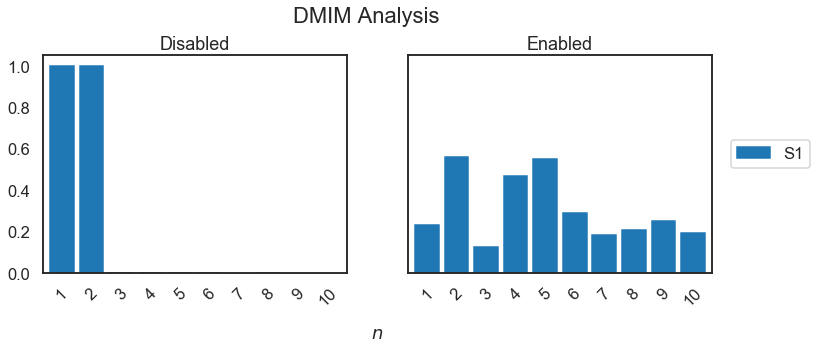

In [10]:
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)

labels = [str(int(i/54)) for i in idx]
disabled.loc[:, 'S1'].plot(kind='bar', 
                           legend=None,
                           title='Disabled',
                           ax=axes[0],
                           use_index=False,
                           rot=45,
                           width=0.8,
                           edgecolor='C0')

enabled.loc[:, 'S1'].plot(kind='bar', 
                          legend=None,
                          title='Enabled',
                          ax=axes[1],
                          use_index=False,
                          rot=45,
                          width=0.8,
                          edgecolor='C0').legend(
                             bbox_to_anchor=(1.35, 0.65)
                          )
fig.suptitle("DMIM Analysis", x=0.5, y=1.05, fontsize=22)

plt.xlabel("$n$", x=-0.1, labelpad=15);

axes[0].set_xticklabels(labels)
axes[1].set_xticklabels(labels);

In [11]:
fig.savefig(FIG_DIR+'DMIM_larger_sample.png', dpi=300, bbox_inches='tight')

---

With full results

In [12]:
tgt_result_idx = all_outputs.columns.tolist().index(tgt_metric)

numeric_samples = to_numeric_samples(all_inputs)[perturbed_cols]
param_idx = numeric_samples.columns.tolist().index(tgt_param)

numeric_vals = numeric_samples.values

# numeric_vals = numeric_vals[idx, :]
np_res = all_outputs.values[:, tgt_result_idx]
np_res = np_res.astype('float64')

rows = np_res.shape[0]

res, idx = incremental_delta_analysis(54, rows, 54)

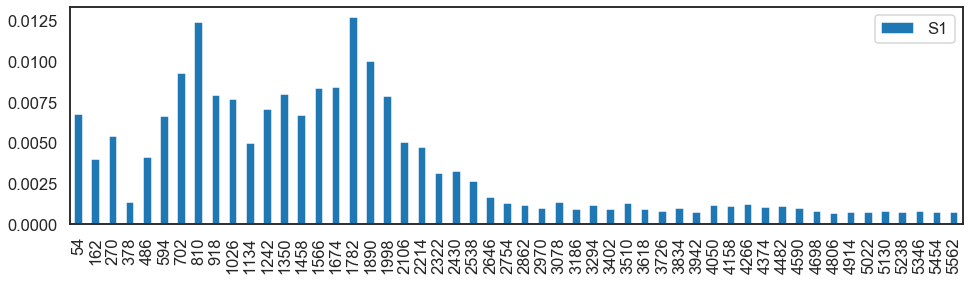

In [13]:
pd.DataFrame({'S1': res[::2]}, index=idx[::2]).plot(kind='bar', figsize=(16,4))